Epoch: 0050 cost= 0.502133965 W= 1.78812 b= 1.55236
Epoch: 0100 cost= 0.231528938 W= 1.53516 b= 2.33797
Optimization Finished!
Training cost= 0.231529 W= 1.53516 b= 2.33797 

Epoch: 0050 cost= 0.106755778 W= 1.36339 b= 2.87142
Epoch: 0100 cost= 0.049224138 W= 1.24676 b= 3.23365
Epoch: 0150 cost= 0.022696769 W= 1.16756 b= 3.47962
Epoch: 0200 cost= 0.010465352 W= 1.11378 b= 3.64664
Optimization Finished!
Training cost= 0.0104654 W= 1.11378 b= 3.64664 

Epoch: 0050 cost= 0.004825459 W= 1.07726 b= 3.76006
Epoch: 0100 cost= 0.002225013 W= 1.05246 b= 3.83707
Epoch: 0150 cost= 0.001025934 W= 1.03562 b= 3.88936
Epoch: 0200 cost= 0.000473050 W= 1.02419 b= 3.92487
Epoch: 0250 cost= 0.000218124 W= 1.01643 b= 3.94899
Epoch: 0300 cost= 0.000100573 W= 1.01115 b= 3.96536
Epoch: 0350 cost= 0.000046374 W= 1.00757 b= 3.97648
Epoch: 0400 cost= 0.000021382 W= 1.00514 b= 3.98403
Epoch: 0450 cost= 0.000009860 W= 1.00349 b= 3.98915
Epoch: 0500 cost= 0.000004545 W= 1.00237 b= 3.99264
Optimization Finished!
Tr

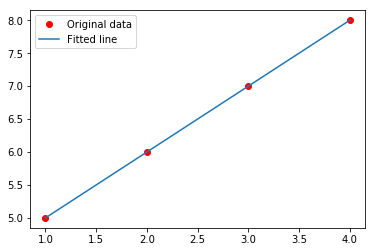

Epoch: 0050 cost= 0.000004156 W= 1.00237 b= 3.99294
Epoch: 0100 cost= 0.000003856 W= 1.0023 b= 3.9932
Optimization Finished!
Training cost= 3.85647e-06 W= 1.0023 b= 3.9932 

Epoch: 0050 cost= 0.000003586 W= 1.00222 b= 3.99344
Epoch: 0100 cost= 0.000003327 W= 1.00214 b= 3.99369
Epoch: 0150 cost= 0.000003094 W= 1.00206 b= 3.99391
Epoch: 0200 cost= 0.000002870 W= 1.00198 b= 3.99413
Optimization Finished!
Training cost= 2.87025e-06 W= 1.00198 b= 3.99413 

Epoch: 0050 cost= 0.000002664 W= 1.00191 b= 3.99435
Epoch: 0100 cost= 0.000002478 W= 1.00184 b= 3.99455
Epoch: 0150 cost= 0.000002301 W= 1.00178 b= 3.99475
Epoch: 0200 cost= 0.000002137 W= 1.00171 b= 3.99494
Epoch: 0250 cost= 0.000001990 W= 1.00165 b= 3.99512
Epoch: 0300 cost= 0.000001850 W= 1.00159 b= 3.99529
Epoch: 0350 cost= 0.000001718 W= 1.00154 b= 3.99546
Epoch: 0400 cost= 0.000001592 W= 1.00148 b= 3.99563
Epoch: 0450 cost= 0.000001472 W= 1.00142 b= 3.9958
Epoch: 0500 cost= 0.000001365 W= 1.00137 b= 3.99596
Optimization Finished!
Tr

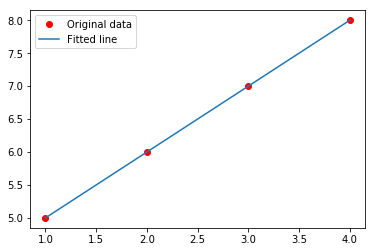

In [24]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf

rng = numpy.random

rate_list = [0.05, 0.005]
epoch_list = [100, 200, 500]
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

train_cost = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in epoch_list:
            for epoch in range(training_epochs):    
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
            print("Optimization Finished!")
            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            #train_cost.append(training_cost)
            print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        train_cost.append(training_cost)    
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()


/home/ubnatu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


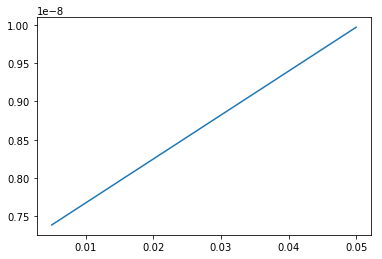

In [22]:
    
import matplotlib.pyplot as plt
import numpy as np

x = np.array(rate_list)
y = np.array(train_cost)

sess2 = tf.Session()
plt.plot(x, y)
plt.legend()
plt.show()